In [17]:
# Importing each library and package
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [18]:
# Putting the data into a Pandas data frame
df = pd.read_csv("data_2017_2021.csv")

In [19]:
df

,LastName,FirstName,Gender,Country,Date,Competition,Round,Location,Apparatus,Rank,D_Score,E_Score,Penalty,Score
0,ABDUL,HADI,w,MAS,SUN 25 JUL 2021,Olympic Games,AAqual,"Tokyo, Japan",BB,76.0,4.8,6.766,NaN,11.566
1,ABDUL,HADI,w,MAS,SUN 25 JUL 2021,Olympic Games,AAqual,"Tokyo, Japan",FX,64.0,4.6,7.633,NaN,12.233
2,ABDUL,HADI,w,MAS,SUN 25 JUL 2021,Olympic Games,AAqual,"Tokyo, Japan",UE,74.0,5.1,6.500,NaN,11.600
3,ABDUL,HADI,w,MAS,SUN 25 JUL 2021,Olympic Games,AAqual,"Tokyo, Japan",VT,72.0,4.6,8.566,NaN,13.166
4,ABDUL HADI,Farah Ann,w,MAS,25-Jul-21,Olympic Games,qual,"Tokyo, Japan",BB,76.0,4.8,6.766,NaN,11.566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1040,de,JESUS,w,FRA,SUN 25 JUL 2021,Olympic Games,AAqual,"Tokyo, Japan",VT,19.0,5.4,9.166,0.1,14.466
1041,van,POL,w,NED,SUN 25 JUL 2021,Olympic Games,AAqual,"Tokyo, Japan",BB,75.0,4.7,6.900,NaN,11.600
1042,van,POL,w,NED,SUN 25 JUL 2021,Olympic Games,AAqual,"Tokyo, Japan",FX,33.0,4.9,8.000,NaN,12.900
1043,van,POL,w,NED,SUN 25 JUL 2021,Olympic Games,AAqual,"Tokyo, Japan",UE,41.0,5.3,7.833,NaN,13.133


In [20]:
# Descriptive statistics table
df.describe()

,Rank,D_Score,E_Score,Penalty,Score
count,761.000000,1045.000000,1045.000000,115.000000,1042.000000
mean,36.752957,5.306124,7.903992,0.316522,13.195744
std,26.714809,0.603090,0.841625,0.849967,1.173016
min,1.000000,0.500000,4.133000,0.100000,3.000000
25%,13.000000,5.000000,7.500000,0.100000,12.566000
50%,31.000000,5.300000,7.966000,0.100000,13.300000
75%,59.000000,5.700000,8.433000,0.300000,14.066000
max,91.000000,6.900000,9.600000,6.500000,15.400000


In [21]:
# Using StandardScaler class in the scaler object
scaler = StandardScaler()

In [22]:
# Transforming the data using StandardScaler
df[['Rank_T', 'D_Score_T', 'E_Score_T', 'Penalty_T', 'Score_T']] = scaler.fit_transform(df[['Rank', 'D_Score', 'E_Score', 'Penalty', 'Score']])

In [23]:
df

,LastName,FirstName,Gender,Country,Date,Competition,Round,Location,Apparatus,Rank,D_Score,E_Score,Penalty,Score,Rank_T,D_Score_T,E_Score_T,Penalty_T,Score_T
0,ABDUL,HADI,w,MAS,SUN 25 JUL 2021,Olympic Games,AAqual,"Tokyo, Japan",BB,76.0,4.8,6.766,NaN,11.566,1.470078,-0.839621,-1.352785,NaN,-1.390029
1,ABDUL,HADI,w,MAS,SUN 25 JUL 2021,Olympic Games,AAqual,"Tokyo, Japan",FX,64.0,4.6,7.633,NaN,12.233,1.020594,-1.171405,-0.322141,NaN,-0.821136
2,ABDUL,HADI,w,MAS,SUN 25 JUL 2021,Olympic Games,AAqual,"Tokyo, Japan",UE,74.0,5.1,6.500,NaN,11.600,1.395164,-0.341944,-1.668992,NaN,-1.361030
3,ABDUL,HADI,w,MAS,SUN 25 JUL 2021,Olympic Games,AAqual,"Tokyo, Japan",VT,72.0,4.6,8.566,NaN,13.166,1.320250,-1.171405,0.786960,NaN,-0.025369
4,ABDUL HADI,Farah Ann,w,MAS,25-Jul-21,Olympic Games,qual,"Tokyo, Japan",BB,76.0,4.8,6.766,NaN,11.566,1.470078,-0.839621,-1.352785,NaN,-1.390029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1040,de,JESUS,w,FRA,SUN 25 JUL 2021,Olympic Games,AAqual,"Tokyo, Japan",VT,19.0,5.4,9.166,0.1,14.466,-0.664973,0.155732,1.500208,-0.255856,1.083417
1041,van,POL,w,NED,SUN 25 JUL 2021,Olympic Games,AAqual,"Tokyo, Japan",BB,75.0,4.7,6.900,NaN,11.600,1.432621,-1.005513,-1.193493,NaN,-1.361030
1042,van,POL,w,NED,SUN 25 JUL 2021,Olympic Games,AAqual,"Tokyo, Japan",FX,33.0,4.9,8.000,NaN,12.900,-0.140575,-0.673729,0.114129,NaN,-0.252244
1043,van,POL,w,NED,SUN 25 JUL 2021,Olympic Games,AAqual,"Tokyo, Japan",UE,41.0,5.3,7.833,NaN,13.133,0.159082,-0.010160,-0.084392,NaN,-0.053515


In [24]:
# Elbow method function
def optimize_k_means(data, max_k):
    means = []
    inertias = []

    # For loop for elbow method
    for k in range(1, max_k):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)
        
        means.append(k)
        inertias.append(kmeans.inertia_)
        
    # Plotting elbow method
    fig = plt.subplots(figsize=(10, 5))
    plt.plot(means, inertias, 'o-')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.grid(True)
    plt.show()

C:\Users\Owner\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


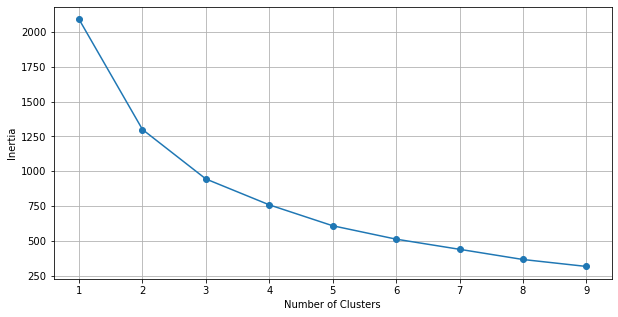

In [25]:
# Calling function with difficulty and execution scores parameters
optimize_k_means(df[['D_Score_T', 'E_Score_T']], 10)

In [26]:
# Calling KMeans class in kmeans object for 3 clusters
kmeans = KMeans(n_clusters=3)

In [27]:
# Fiting the data
kmeans.fit(df[['D_Score_T', 'E_Score_T']])

KMeans(n_clusters=3)

In [28]:
df['kmeans_3'] = kmeans.labels_

In [29]:
df

,LastName,FirstName,Gender,Country,Date,Competition,Round,Location,Apparatus,Rank,D_Score,E_Score,Penalty,Score,Rank_T,D_Score_T,E_Score_T,Penalty_T,Score_T,kmeans_3
0,ABDUL,HADI,w,MAS,SUN 25 JUL 2021,Olympic Games,AAqual,"Tokyo, Japan",BB,76.0,4.8,6.766,NaN,11.566,1.470078,-0.839621,-1.352785,NaN,-1.390029,0
1,ABDUL,HADI,w,MAS,SUN 25 JUL 2021,Olympic Games,AAqual,"Tokyo, Japan",FX,64.0,4.6,7.633,NaN,12.233,1.020594,-1.171405,-0.322141,NaN,-0.821136,2
2,ABDUL,HADI,w,MAS,SUN 25 JUL 2021,Olympic Games,AAqual,"Tokyo, Japan",UE,74.0,5.1,6.500,NaN,11.600,1.395164,-0.341944,-1.668992,NaN,-1.361030,0
3,ABDUL,HADI,w,MAS,SUN 25 JUL 2021,Olympic Games,AAqual,"Tokyo, Japan",VT,72.0,4.6,8.566,NaN,13.166,1.320250,-1.171405,0.786960,NaN,-0.025369,2
4,ABDUL HADI,Farah Ann,w,MAS,25-Jul-21,Olympic Games,qual,"Tokyo, Japan",BB,76.0,4.8,6.766,NaN,11.566,1.470078,-0.839621,-1.352785,NaN,-1.390029,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1040,de,JESUS,w,FRA,SUN 25 JUL 2021,Olympic Games,AAqual,"Tokyo, Japan",VT,19.0,5.4,9.166,0.1,14.466,-0.664973,0.155732,1.500208,-0.255856,1.083417,1
1041,van,POL,w,NED,SUN 25 JUL 2021,Olympic Games,AAqual,"Tokyo, Japan",BB,75.0,4.7,6.900,NaN,11.600,1.432621,-1.005513,-1.193493,NaN,-1.361030,0
1042,van,POL,w,NED,SUN 25 JUL 2021,Olympic Games,AAqual,"Tokyo, Japan",FX,33.0,4.9,8.000,NaN,12.900,-0.140575,-0.673729,0.114129,NaN,-0.252244,2
1043,van,POL,w,NED,SUN 25 JUL 2021,Olympic Games,AAqual,"Tokyo, Japan",UE,41.0,5.3,7.833,NaN,13.133,0.159082,-0.010160,-0.084392,NaN,-0.053515,2


In [30]:
df[["LastName", "FirstName", "Competition", "Apparatus", "D_Score", "E_Score", "D_Score_T", "E_Score_T", "kmeans_3"]]

,LastName,FirstName,Competition,Apparatus,D_Score,E_Score,D_Score_T,E_Score_T,kmeans_3
0,ABDUL,HADI,Olympic Games,BB,4.8,6.766,-0.839621,-1.352785,0
1,ABDUL,HADI,Olympic Games,FX,4.6,7.633,-1.171405,-0.322141,2
2,ABDUL,HADI,Olympic Games,UE,5.1,6.500,-0.341944,-1.668992,0
3,ABDUL,HADI,Olympic Games,VT,4.6,8.566,-1.171405,0.786960,2
4,ABDUL HADI,Farah Ann,Olympic Games,BB,4.8,6.766,-0.839621,-1.352785,0
...,...,...,...,...,...,...,...,...,...
1040,de,JESUS,Olympic Games,VT,5.4,9.166,0.155732,1.500208,1
1041,van,POL,Olympic Games,BB,4.7,6.900,-1.005513,-1.193493,0
1042,van,POL,Olympic Games,FX,4.9,8.000,-0.673729,0.114129,2
1043,van,POL,Olympic Games,UE,5.3,7.833,-0.010160,-0.084392,2


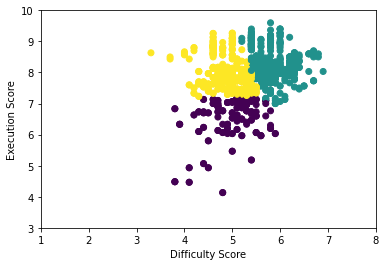

In [33]:
# Plotting clusters

x=df['D_Score']
y=df['E_Score']
plt.scatter(x=df['D_Score'], y=df['E_Score'], c=df['kmeans_3'])
plt.xlabel('Difficulty Score')
plt.ylabel('Execution Score')
plt.xlim(1, 8)
plt.ylim(3, 10)
plt.show()